# Raices de funciones

En muchos problemas buscamos conocer el valor $\hat x$ que cumple la condición $f(\hat x)=0$. Este valor se le llama la raiz o cero de la función $f(x)$.

Podemos usar métodos iterativos para aproximar el error absoluto $\vert f(\hat x)-0 \vert <= \varepsilon$, para una tolerancia dada $\varepsilon$.

Los métodos iterativos van a construir una secuencia de valores $x_i \mapsto \hat x$ tal que $i=1 \ldots n$ siendo $n$ la cantidad total de iteraciones.

## Método de Búsqueda Incremental

Este método utiliza el terorema del valor intermedio para encontrar raies reales. Si $f(x)$ es continua en el intervalo $[a,b]$, entonces:

$\mathtt{sign}(f(a))\neq \mathtt{sign}(f(b)) \wedge a < c < b \implies f(c)=0$

1.- Dado que $c$ es desconocido, podemos hacer $x_1=a$ y $x_2=a+\varepsilon$. 

2.- Si $\mathtt{sign}(f(x_1))\neq \mathtt{sign}(f(x_2))$, entonces $c=\frac{x_1+x_2}{2}$.

3.- De lo contrario, $x_1=x_2$, $x_2=x_2+\varepsilon$.

4.- Continuar
    


In [1]:
function root_search(f::Function,a,b,eps,N)
    n=1
    x1=a
    x2=a+eps
    c=(x1+x2)/2.0
    while sign(f(x1))==sign(f(x2))
        if n>=N
            break
        end
        x1=x2
        x2+=eps
        n+=1
        c=(x1+x2)/2.0
    end
    y=f(c)
    return y,c,n
end
            

root_search (generic function with 1 method)

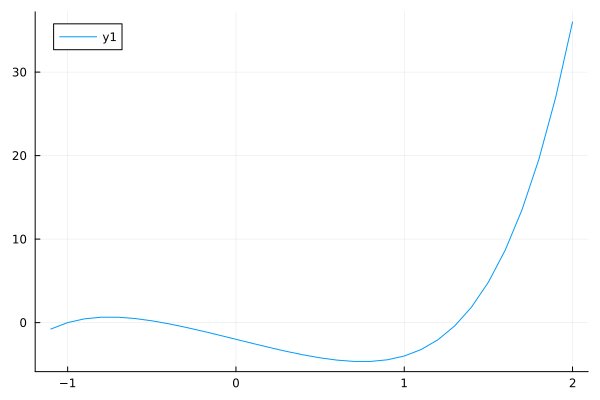

In [2]:
using Plots

f(x)=x^5+2x^3-5x-2

x=-1.1:0.1:2.0
y=f.(x)
plot(x,y,Linewidth=2)

In [3]:
f(-1.05),f(-0.95)

(-0.3415315625000006, 0.2614690625000007)

In [7]:
f(1.),f(2.)

(-4.0, 36.0)

In [15]:
f(x)=x^5+2x^3-5x-2
y,c,n=root_search(f,1.,2., eps(Float64),1e6)
print("El valor de x es $c, iteraciones : $n")

El valor de x es 1.0000000002220446, iteraciones : 1000000

In [13]:
eps(Float16)

Float16(0.000977)

In [16]:
abs(f(c))

3.9999999986677324

In [14]:
f(x)=x^2-3
y,c,n=root_search(f,1.0,2.0,1e-3,773)
print("El valor de x es $c, y : $y, iteraciones : $n")

El valor de x es 1.7324999999999193, y : 0.0015562499997203716, iteraciones : 733

In [18]:
f(c)

-0.3415315625000006

In [22]:
y,c,n=root_search(f,1.3,1.4,1e-6,1e5)
print("El valor de x es $c, iteraciones : $n")

El valor de x es 1.3999994999917735, iteraciones : 100000

In [27]:
err=abs(f(c))
print("error absoluto : $err")

error absoluto : 6.859453883123479e-6

# Metodo de la Biseccion

El metodo de la biseccion utiliza el teorema del valor intermedio para encontrar raices reales. 
		
1.- Sea $[a,b]$ un intervalo de inicio

2.- Hacemos $m=\frac{b+a}{2}$ 

3.- Si $f(m)=0$ entonces $m$ es una raiz real. 

4.- De lo contrario evaluamos el signo de la funcion en el intervalo $[a,m]$ y $[m,b]$.

4.- Repetir hasta alcanzar la tolerancia especificada $\vert b_n - a_n \vert \leq \varepsilon$.
	

In [17]:
function bisection(f::Function,a,b,eps,N)
    n=0
    c=0
    while n<=N
        c=a+(b-a)/2
        if f(c)==0 || abs(a-b)<=eps
            break
        end
        sign(f(c)) == sign(f(a)) ? a=c : b=c
        n+=1
    end
    y=f(c)
    return y,c,n
end

bisection (generic function with 1 method)

In [19]:
function recursive_bisection(f::Function,a,b,eps,n)
    c=a+(b-a)/2
    if f(c)==0 || abs(a-b)<=eps
        y=f(c)
        return c,n
    else
        sign(f(c)) == sign(f(a)) ? a=c : b=c
        #println("[$a,$b]")
        return recursive_bisection(f,a,b,eps,n+1)
    end
end

recursive_bisection (generic function with 1 method)

In [22]:
f(x)=x^5+2x^3-5x-2
y,c,n=bisection(f,-1.05,-0.95, eps(Float64),100)
print("El valor de x es $c, iteraciones : $n")

El valor de x es -1.0, iteraciones : 0

In [23]:
f(c)

0.0

In [25]:
c,n=recursive_bisection(f,-1.05,-0.95,eps(Float64),0)
print("El valor de x es $c, recursiones : $n")

El valor de x es -1.0, recursiones : 0

In [91]:
y,c,n=bisection(x->x^2-3,1.0,2.0,1e-3,100)
print("El valor de x es $c, iteraciones : $n")

El valor de x es 1.73193359375, iteraciones : 11

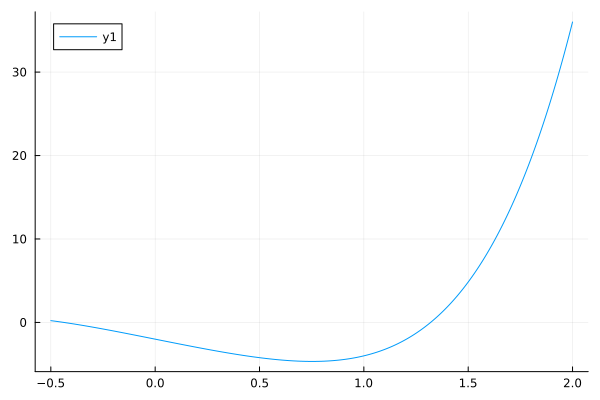

In [101]:
f(x)=x^5+2x^3-5x-2

x=-0.5:0.01:2
y=f.(x)
plot(x,y,Linewidth=2)

In [95]:
err=round(abs(f(c)),digits=4)
print("error absoluto : $err")

error absoluto : 15.3137

# Tarea 

1.- Determine el intervalo y el punto inicial para la funcion $f(x)=\frac{1}{tan(x)}$ 

2.- Encuentre el valor $x$ mediante el método iterativo. Muestre la cantidad de iteraciones necesarias para distintos valores $\varepsilon$. 

3.- Encuentre el valor $x$ mediante el método de la bisección. Muestre la cantidad de iteraciones necesarias para distintos valores $\varepsilon$. 